In [3]:
import matplotlib.pyplot as plt
import numpy as np 

In [4]:
def get_image(buff, dim):
    dt = np.dtype('uint32')
    dt = dt.newbyteorder('>')
    im = np.frombuffer(buff, dtype=dt) 
    return np.reshape(im, (dim[0],dim[1]))
dim = (960,1280)

Spatial filter

In [353]:
name1 = '24-04-22-collimation_50mW_2000us_0mm'
name2 = '24-04-22-spatial_50mW_2000us_30um_0mm_1'
name3 = '24-04-22-spatial_50mW_2000us_30um_45mm_1'

In [354]:
with open(name1+'/int_image','rb') as fp:
    buff = fp.read()
    im1 = get_image(buff, dim)
with open(name2+'/int_image','rb') as fp:
    buff = fp.read()
    im2 = get_image(buff, dim)
with open(name3+'/int_image','rb') as fp:
    buff = fp.read()
    im3 = get_image(buff, dim)

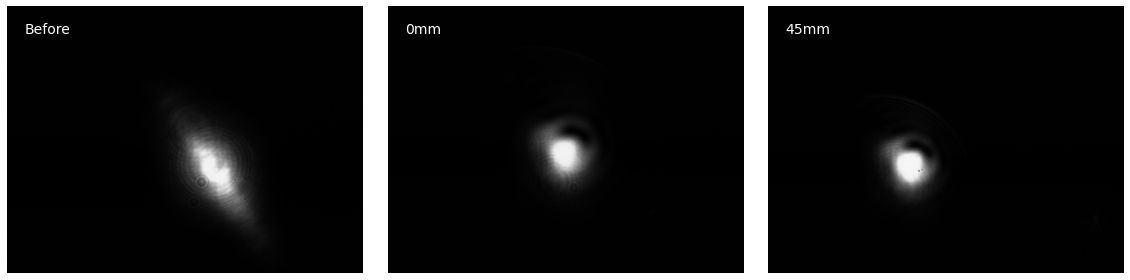

In [355]:
fig, ax = plt.subplots(1,3, figsize=(16,4))
ax[0].imshow(im1, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(im2, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(im3, cmap='gray', vmin=0, vmax=255)
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
ax[0].text(0.05,0.9,'Before', transform=ax[0].transAxes, color='w', fontsize=14)
ax[1].text(0.05,0.9,'0mm', transform=ax[1].transAxes, color='w', fontsize=14)
ax[2].text(0.05,0.9,'45mm', transform=ax[2].transAxes, color='w', fontsize=14)

plt.tight_layout()
plt.show()

In [356]:
px1 = np.ndarray.flatten(im1)
px2 = np.ndarray.flatten(im2)
px3 = np.ndarray.flatten(im3)

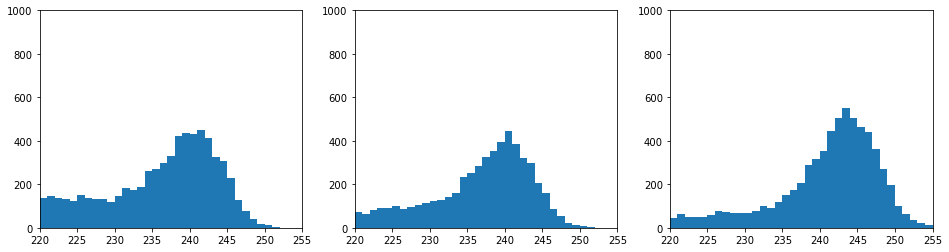

In [357]:
bins = np.arange(256)
fig, ax = plt.subplots(1,3)
ax[0].hist(px1 , bins=bins)
ax[1].hist(px2 , bins=bins)
ax[2].hist(px3 , bins=bins)

ax[0].set_xlim((220,255))
ax[1].set_xlim((220,255))
ax[2].set_xlim((220,255))

ax[0].set_ylim((0,1000))
ax[1].set_ylim((0,1000))
ax[2].set_ylim((0,1000))
fig.set_size_inches(16,4)
plt.show()

In [358]:
np.sum(px2)/np.sum(px1)

0.6506677692038341

In [359]:
np.sum(px3)/np.sum(px1)

0.6071743511283669

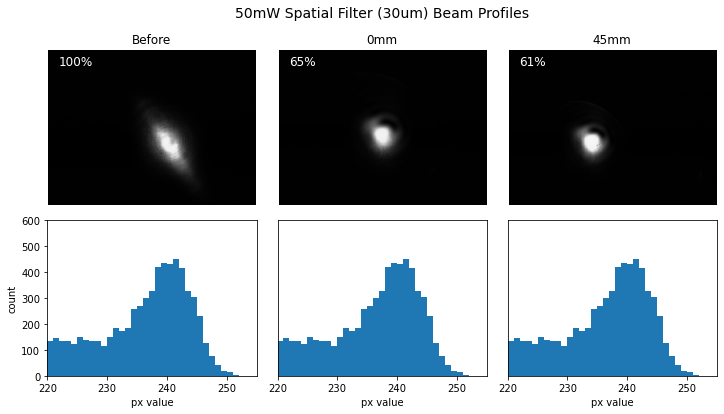

In [395]:
fig, axes = plt.subplots(2,3, figsize=(12,6), tight_layout=False)
labels = 'Before', '0mm', '45mm'
ims=[im1,im2,im3]
pxs=[px1,px2,px3]
sums=list(map(lambda x:np.sum(x), pxs))
power = np.round(sums/sums[0]*100,0)
for ii, ax in enumerate(axes[0,:]):
    ax.imshow(ims[ii], cmap='gray', vmin=0, vmax=255)
    ax.set_axis_off()
    ax.set_title(labels[ii])
    ax.text(0.05,0.9, str(int(power[ii]))+'%', transform=ax.transAxes, color='w', fontsize=12)
for ii, ax in enumerate(axes[1,:]):
    ax.hist(px1 , bins=bins)
    ax.set_xlim((220,255))
    ax.set_ylim((0,600))
    ax.set_xlabel("px value")

axes[1,0].set_ylabel("count")
axes[1,1].set_yticks([])
axes[1,2].set_yticks([])

plt.suptitle('50mW Spatial Filter (30um) Beam Profiles', x=(fig.subplotpars.left+fig.subplotpars.right)/2, fontsize=14)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('out.png', dpi=500)
plt.show()

BCP

In [398]:
name1='24-04-25-bcp_300us_0mm'
name2='24-04-25-bcp_300us_15mm'
name3='24-04-25-bcp_300us_40mm'
# name1='24-04-25-bcp_400us_0mm'
# name2='24-04-25-bcp_400us_15mm'
# name3='24-04-25-bcp_400us_40mm'

In [399]:
with open(name1+'/int_image','rb') as fp:
    buff = fp.read()
    im1 = get_image(buff, dim)
with open(name2+'/int_image','rb') as fp:
    buff = fp.read()
    im2 = get_image(buff, dim)
with open(name3+'/int_image','rb') as fp:
    buff = fp.read()
    im3 = get_image(buff, dim)

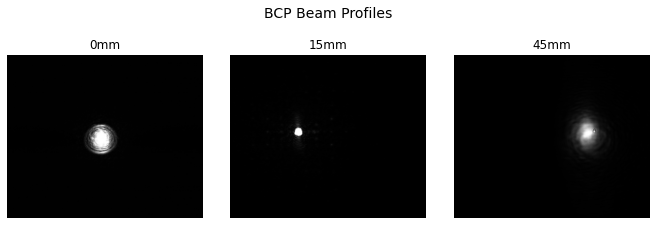

In [419]:
fig, ax = plt.subplots(1,3, figsize=(12,3), tight_layout=False)
ims=[im1,im2,im3]
labels = '0mm','15mm','45mm'
for ii, im in enumerate(ims):
    ax[ii].imshow(im, cmap='gray', vmin=0, vmax=255)
    ax[ii].set_xlim([500,1100])
    ax[ii].set_ylim([200,700])
    ax[ii].set_axis_off()
#     ax[ii].text(0.5,0.9,labels[ii], transform=ax[ii].transAxes, color='w', fontsize=12, horizontalalignment='center')
    ax[ii].set_title(labels[ii])

plt.suptitle('BCP Beam Profiles', x=(fig.subplotpars.left+fig.subplotpars.right)/2, fontsize=14, y=1.1)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('out.png', dpi=500, bbox_inches='tight')

In [86]:
px1 = np.ndarray.flatten(im1)
px2 = np.ndarray.flatten(im2)
px3 = np.ndarray.flatten(im3)

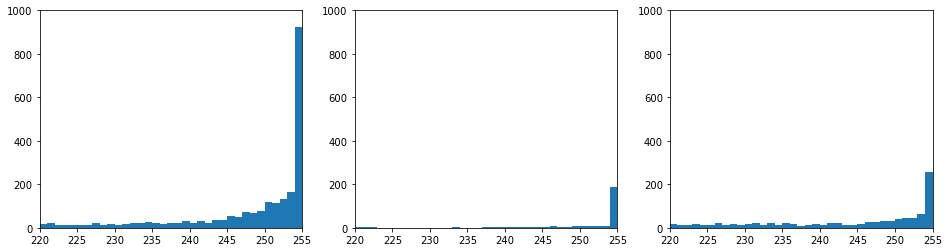

In [87]:
bins = np.arange(256)
fig, ax = plt.subplots(1,3)
ax[0].hist(px1 , bins=bins)
ax[1].hist(px2 , bins=bins)
ax[2].hist(px3 , bins=bins)

ax[0].set_xlim((220,255))
ax[1].set_xlim((220,255))
ax[2].set_xlim((220,255))

ax[0].set_ylim((0,1000))
ax[1].set_ylim((0,1000))
ax[2].set_ylim((0,1000))
fig.set_size_inches(16,4)
plt.show()